3주차 복습 예제

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# 1번

 iris데이터셋 준비

In [32]:
from sklearn.datasets import load_iris
import pandas as pd
iris_dataset=load_iris()
X=pd.DataFrame(iris_dataset['data'],columns=iris_dataset['feature_names'])
y=pd.DataFrame(iris_dataset['target'],columns=['target'])

In [33]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [34]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


y데이터의 구성을 확인하고(value_counts, unique 등 자유롭게 이용) KNeighborClassifier,KNeighborRegressor 중 사용할 모델을 import 하세요.

In [42]:

from sklearn.neighbors import KNeighborsClassifier
y['target'].value_counts()
y['target'].unique().tolist()


[0, 1, 2]

y데이터 클래스의 비율을 유지한 채 훈련데이터와 테스트데이터를 나누세요(random_state=10) 

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y,random_state=10)


In [45]:
knr = KNeighborsClassifier(n_neighbors = 4)
knr.fit(X_train,y_train)
a = np.ravel(y_test, order='C')

print(f'X_test pred : {knr.predict(X_test)}')
print(f'y_test : {a}')

X_test pred : [0 2 0 2 1 0 1 1 0 1 2 2 2 0 2 1 0 0 2 1 0 0 2 0 2 1 2 1 0 2 1 1 1 2 1 0 2
 2 0 1 1 1 0 0 1]
y_test : [0 2 0 2 1 0 1 1 0 1 2 2 2 0 2 1 0 0 2 1 0 0 2 0 2 1 2 1 0 2 2 1 1 2 1 0 2
 2 0 1 1 1 0 0 1]


n_neighbors=4로 학습시키고 X_test 데이터의 pred값, y_test 값을 각각 출력하세요
(y_test는 pred와 같은 형식으로 출력 hint) ravel(), flatten() 등

accuracy_score, kn.score로 각각 출력하세요

In [46]:
from sklearn.metrics import accuracy_score
y_pred = knr.predict(X_test)
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'kn.score : {knr.score(X_test, y_test)}')

accuracy_score : 0.9777777777777777
kn.score : 0.9777777777777777


# 2번

boston 주택가격 데이터셋 준비

In [47]:
from sklearn.datasets import load_boston
boston=load_boston()
X=pd.DataFrame(boston['data'],columns=boston['feature_names'])
y=pd.DataFrame(boston.target,columns=['price'])

In [48]:
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [49]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [50]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


데이터셋을 훈련 데이터, 테스트 데이터로 나누세요.(random_state=10)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=10)



In [52]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors를 1~10까지 했을 떄 가장 mean_absolute_error가 가장 낮은 n_neighbors 수를 출력하고 1~10까지의 error를 시각화 하세요

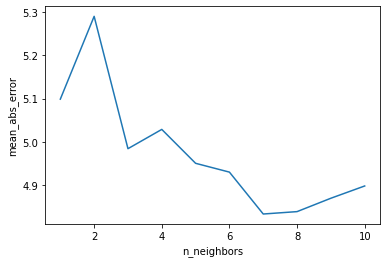

In [54]:
from sklearn.metrics import mean_absolute_error

mae = []
neighbors = []
for i in range(1,11):

  n_neighbors = i
  knr = KNeighborsRegressor(n_neighbors=n_neighbors)
  knr.fit(X_train,y_train)
  y_pred = knr.predict(X_test)
  mae.append(mean_absolute_error(y_test, y_pred))
  neighbors.append(i)

from matplotlib import pyplot as plt

plt.plot(neighbors, mae)
plt.xlabel('n_neighbors')  #x축 레이블 추가
plt.ylabel('mean_abs_error')  #y축 레이블 추가
plt.show()


In [55]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1. 선형 회귀

In [56]:
# advertising.csv (광고(TV, Radio, Newspaper) 및 판매량(Sales) 데이터셋)
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising (1).csv


In [57]:
# csv파일 dataframe으로 읽어들이기
df = pd.read_csv('advertising.csv')

## 탐색적 데이터 분석

In [58]:
# 첫 5행 출력
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [59]:
# 데이터프레임 shape 츨력
df.shape

(200, 4)

In [60]:
# 컬럼별 통계량 출력
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [61]:
# 결측치 확인
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

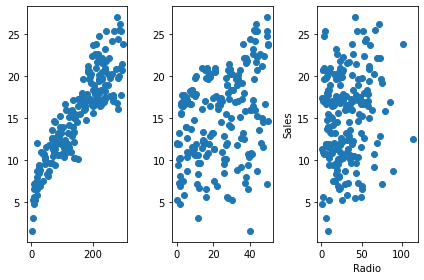

In [83]:
# scatter plot을 사용해 Sales와 나머지 변수 간의 관계 확인
fig, axs = plt.subplots(1,3,sharey=True)

axs[0].scatter(df['TV'],df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')


axs[2].scatter(df['Newspaper'],df['Sales'])
plt.xlabel('Newspaper')

axs[1].scatter(df['Radio'],df['Sales'])
plt.xlabel('Radio')


plt.tight_layout()
plt.show()

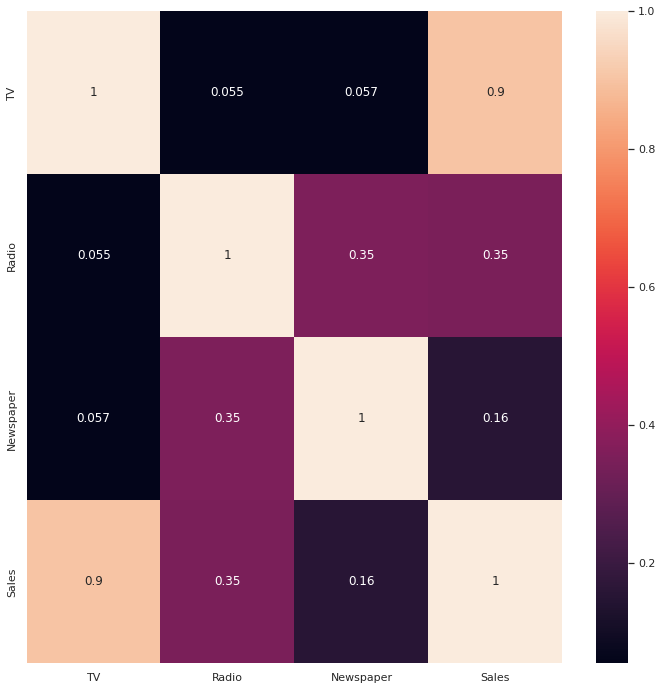

In [23]:
# 변수 간의 correlation 확인 (힌트 : seaborn의 heatmap, dataframe의 corr() 사용)

df_corr = df.corr()


sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(df.corr(), annot=True)


## 모델 생성, 학습

In [84]:
# scatterplot과 heatmap에서 볼 수 있듯이, Sales와 가장 상관관계가 높은 변수가 TV이므로 
# TV 변수만을 이용해 simple linear regression 하자.
# +) 변수가 하나일 때 추정한 선형모델이 잘 fitting되는지 2차원 그래프에서 확인하기 쉬워서 변수를 하나만 선택했다.
# 실제로는 여러 변수를 사용하고, 기존 변수들로부터 새로운 변수를 만들어내기도 한다. 
# 이러한 feature engineering 과정은 ML에서 핵심적이다.
X = df[['TV']]
y = df['Sales']



In [85]:
# train-test split (7:3)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [86]:
# 선형 회귀 모델 생성
lr = LinearRegression()


# 학습 데이터를 이용해 모델 학습
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
# The coefficients
# 추정한 W값
print('Coefficients:\n',lr.coef_)
# 추정한 b값
print('Intercept: \n', lr.intercept_)
# The intercept


Coefficients:
 [0.05483488]
Intercept: 
 7.206554548173251


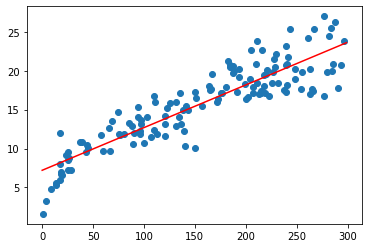

In [88]:
# 학습 데이터 산점도를 그리고, 추정한 선형 모델을 표시해 잘 fitting되었는지 확인한다.


plt.scatter(X_train, y_train)
point = np.arange(0,300)
plt.plot(point, lr.predict(point.reshape(-1,1)), c='r')
plt.show()

## 모델 evaluation

In [90]:
# 학습시킨 모델로 테스트 데이터 예측
pred = lr.predict(X_test)

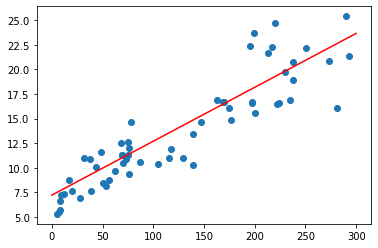

In [92]:
# 테스트 데이터 산점도를 그리고, 추정한 선형 모델을 표시해 잘 fitting되었는지 확인한다.
plt.scatter(X_test, y_test)
point = np.arange(0,300,0.01)
plt.plot(point, lr.predict(point.reshape(-1,1)), c='r')
plt.show()

In [93]:
# MSE 소수점 둘째 자리까지
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE : %.2f" %mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# R-squared 소수점 둘째 자리까지
# R2 = 0.816 의미 : Sales 분산의 81.6%는 TV로 설명된다
print("R2 : %.2f" % r2)

MSE : 5.18
R2 : 0.81


In [94]:
# mse 직접 구현 (X_np, lr.coef_, lr.intercept_, y_test 및 np 함수 사용)
# sklearn의 mean_squared_error함수로 구한 것과 일치하는지 확인

MSE = np.sum((y_test - y_pred)**2) / len(y_test)
print('MSE : ', MSE)

MSE :  5.179525402166653


# 2. 다항 회귀

다항회귀로 당뇨병 예측 모델 만들기 

In [95]:
#PolynomialFeatures 임포트

from sklearn.preprocessing import PolynomialFeatures

In [96]:
#데이터 셋 준비

diabetes_dataset = datasets.load_diabetes()


In [99]:
diabetes_dataset.data
#diabetes_dataset.feature_names

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## 2차식 피처로 변환

In [107]:
#PolynomialFeatures로 2차식 변환
polynomial_transformer = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)# pdf 자료 참고
polynomial_data = diabetes_dataset.data
polynomial_feature_names = polynomial_transformer.get_feature_names(diabetes_dataset.feature_names)

AttributeError: ignored

In [100]:
#X, y 준비 (힌트 : feature 데이터는 polynomial_data에, target 데이터는 diabetes_dataset.target에 있으며 columns는 diabetes)

X = pd.DataFrame(polynomial_data, columns=diabetes_dataset.feature_names)
y = pd.DataFrame(diabetes_dataset.target, columns=['diabetes'])

#선형 회귀

In [101]:
#데이터 스플릿 (8 : 2) random_state 5로
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=5)


In [103]:
#선형 회귀 모델 생성 및 학습
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [104]:
#예측
y_test_prediction = model.predict(x_test)

In [106]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_test_prediction))
print("RMSE : %.2f" %rmse)


RMSE : 54.60
